In [1]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

In [2]:
data_cycle = 'all_condition_stat_cycle_filtered.csv'

In [3]:
data = pd.read_csv("./data/"+data_cycle)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300,down
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300,down
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300,down
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300,down
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215052,580.818322,3.133201,2.587196,2.310177,0.213215,13.073614,1.431366,1.851970,54.386073,44.422093,...,-0.219265,-2.766058,4.170769,0.553080,0.067663,4,6.0,5000,500,up
215053,582.032368,3.721833,2.669275,3.034522,0.380387,14.117784,1.681629,3.203336,57.948220,42.156799,...,-0.161040,-2.854631,3.320326,0.233940,-0.496502,4,6.0,5000,500,up
215054,583.426041,3.511822,2.444397,2.999400,0.492054,13.476082,1.526276,2.936469,55.148492,43.277311,...,-0.034108,-2.835090,3.020172,0.207604,-0.521229,4,6.0,5000,500,up
215055,580.350537,3.449806,2.239240,3.012830,0.292238,10.928611,1.126394,1.072886,58.075829,45.329429,...,-0.153948,-3.146117,2.982659,0.284559,-0.278496,4,6.0,5000,500,up


In [4]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

In [5]:
groups_ae = down.groupby('Ae')

In [6]:
ae_1 = groups_ae.get_group(1)
ae_1 = ae_1.reset_index(drop=True)
ae_1 = ae_1.drop(['Milling_Type'], axis=1)

ae_2 = groups_ae.get_group(2)
ae_2 = ae_2.reset_index(drop=True)
ae_2 = ae_2.drop(['Milling_Type'], axis=1)

ae_3 = groups_ae.get_group(3)
ae_3 = ae_3.reset_index(drop=True)
ae_3 = ae_3.drop(['Milling_Type'], axis=1)

ae_4 = groups_ae.get_group(4)
ae_4 = ae_4.reset_index(drop=True)
ae_4 = ae_4.drop(['Milling_Type'], axis=1)

In [7]:
ae_1

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_std,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.135774,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,0.127980,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,0.133384,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,0.142687,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,0.146143,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28221,312.616808,1.428955,1.064660,1.120915,0.007574,4.543678,0.963599,0.042633,56.426509,45.006056,...,0.799623,-0.112994,-1.432706,2.073735,0.522599,-0.405881,1,6.0,5000,500
28222,312.657358,1.336809,0.954785,1.046379,0.027942,4.038671,0.879551,-0.009713,60.908862,44.050381,...,0.806583,-0.150507,-1.574422,1.969116,0.426017,-0.509519,1,6.0,5000,500
28223,312.731051,1.298434,0.904265,1.073540,0.072423,3.573451,0.713011,-0.511100,56.043557,45.447322,...,0.818183,-0.100907,-1.428698,2.007818,0.492405,-0.449965,1,6.0,5000,500
28224,309.550113,1.431176,1.035213,1.150448,0.058346,4.344843,0.905994,-0.002951,59.119451,47.013285,...,0.785033,-0.139168,-1.403248,2.117403,0.530921,-0.436088,1,6.0,5000,500


## 다운밀링

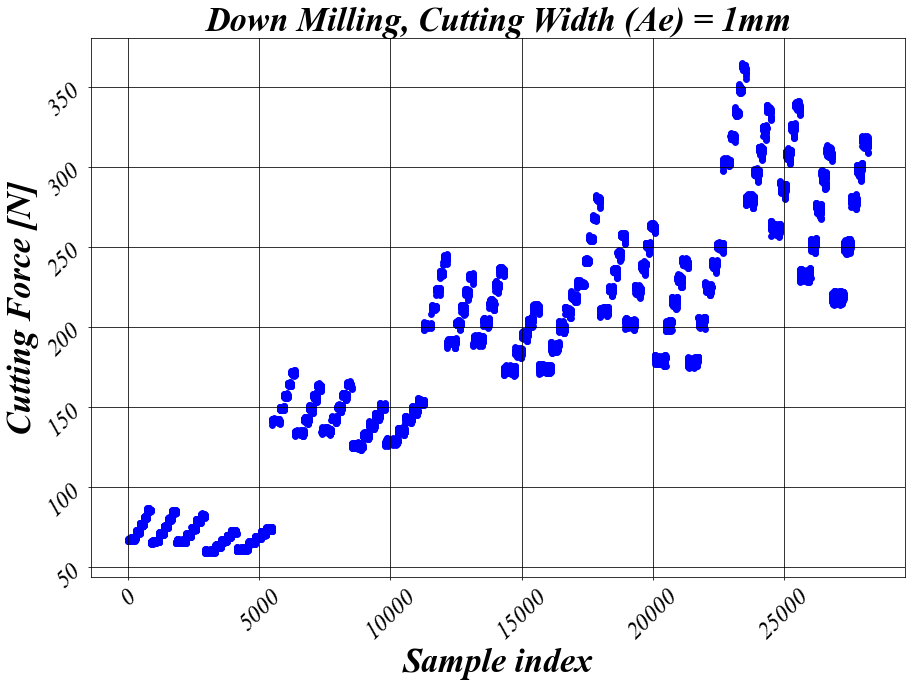

In [8]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Width (Ae) = 1mm',**tfont)
plt.scatter(range(0, len(ae_1['RMS_CF_max'])), ae_1['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

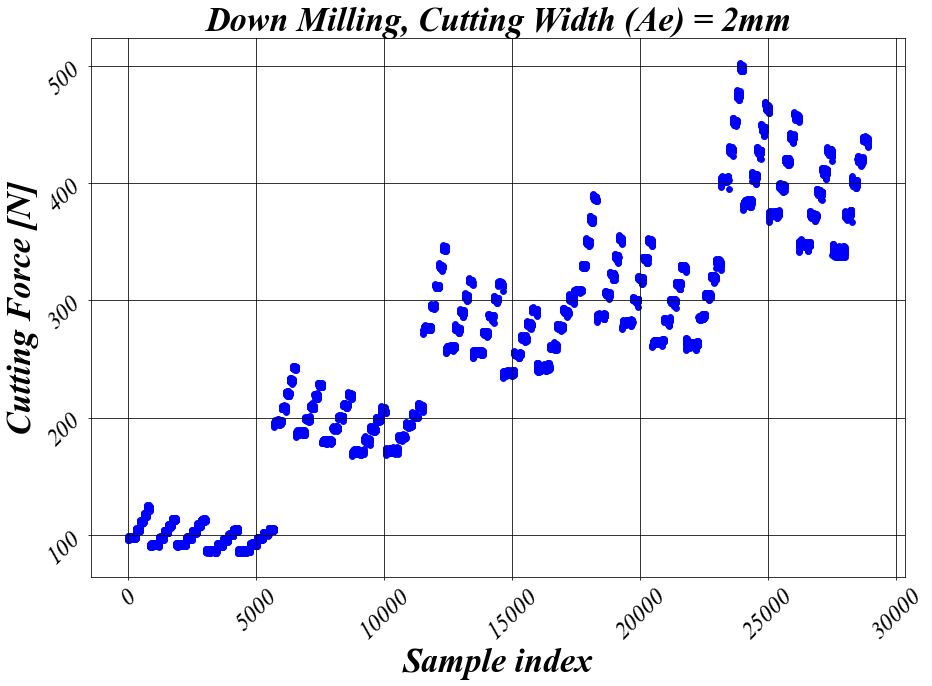

In [9]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Width (Ae) = 2mm',**tfont)
plt.scatter(range(0, len(ae_2['RMS_CF_max'])), ae_2['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

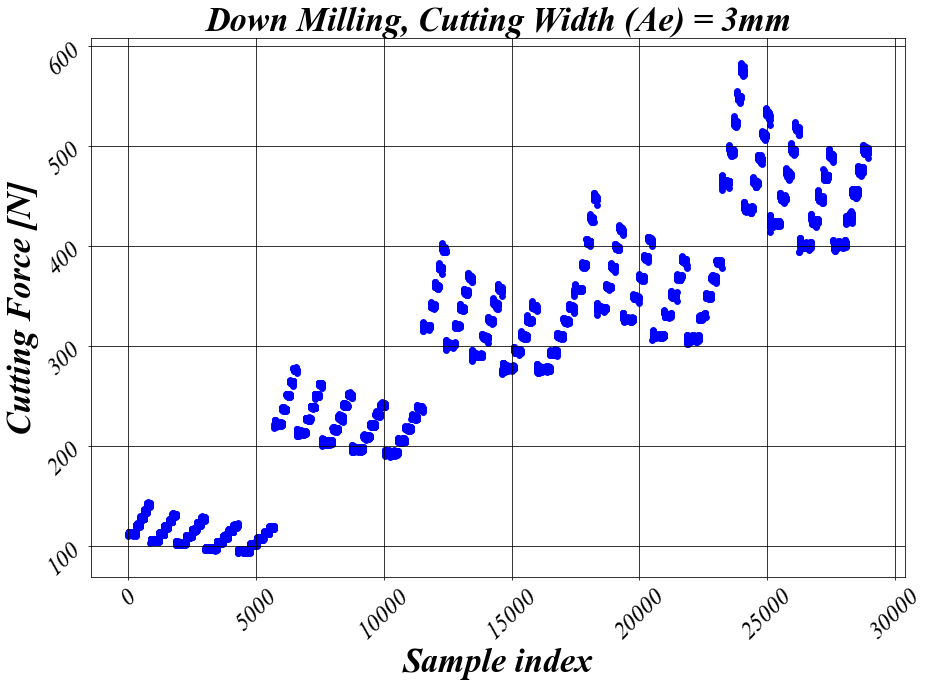

In [10]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Width (Ae) = 3mm',**tfont)
plt.scatter(range(0, len(ae_3['RMS_CF_max'])), ae_3['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

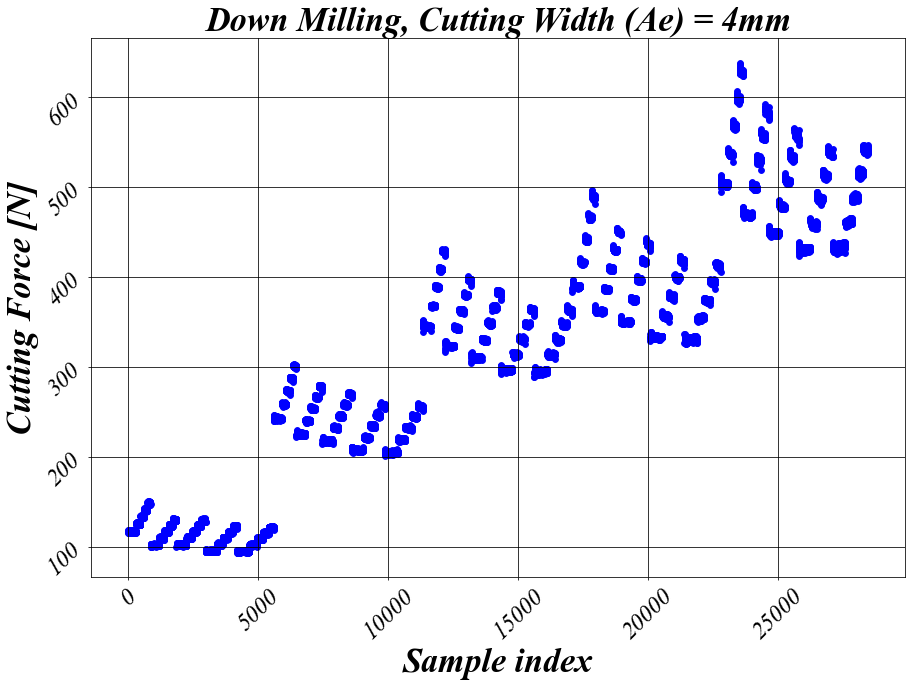

In [11]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Width (Ae) = 4mm',**tfont)
plt.scatter(range(0, len(ae_4['RMS_CF_max'])), ae_4['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

## Ae 1 test

In [12]:
train = pd.concat([ae_2, ae_3, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [13]:
X_test = ae_1.iloc[: , 1:]
y_test = ae_1['RMS_CF_max']

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [15]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:309.95315	validation_0-mape:0.98776	validation_1-rmse:197.47911	validation_1-mape:0.98291
[1]	validation_0-rmse:306.86310	validation_0-mape:0.97787	validation_1-rmse:194.80979	validation_1-mape:0.96937
[2]	validation_0-rmse:303.80397	validation_0-mape:0.96808	validation_1-rmse:192.16748	validation_1-mape:0.95598
[3]	validation_0-rmse:300.77547	validation_0-mape:0.95838	validation_1-rmse:189.55200	validation_1-mape:0.94273
[4]	validation_0-rmse:297.77746	validation_0-mape:0.94878	validation_1-rmse:186.96353	validation_1-mape:0.92960
[5]	validation_0-rmse:294.80942	validation_0-mape:0.93928	validation_1-rmse:184.39959	validation_1-mape:0.91661
[6]	validation_0-rmse:291.87104	validation_0-mape:0.92987	validation_1-rmse:181.85239	validation_1-mape:0.90371
[7]	validation_0-rmse:288.96209	validation_0-mape:0.92056	validation_1-rmse:179.34322	validation_1-mape:0.89100
[8]	validation_0-rmse:286.08224	validation_0-mape:0.91134	validation_1-rmse:176.85661	validation_1-mape:

[73]	validation_0-rmse:149.32736	validation_0-mape:0.47351	validation_1-rmse:58.99853	validation_1-mape:0.27954
[74]	validation_0-rmse:147.84378	validation_0-mape:0.46876	validation_1-rmse:57.75009	validation_1-mape:0.27306
[75]	validation_0-rmse:146.37500	validation_0-mape:0.46406	validation_1-rmse:56.53492	validation_1-mape:0.26676
[76]	validation_0-rmse:144.92022	validation_0-mape:0.45941	validation_1-rmse:55.30121	validation_1-mape:0.26042
[77]	validation_0-rmse:143.48088	validation_0-mape:0.45480	validation_1-rmse:54.11634	validation_1-mape:0.25427
[78]	validation_0-rmse:142.05504	validation_0-mape:0.45024	validation_1-rmse:52.91429	validation_1-mape:0.24806
[79]	validation_0-rmse:140.64426	validation_0-mape:0.44572	validation_1-rmse:51.72474	validation_1-mape:0.24193
[80]	validation_0-rmse:139.24740	validation_0-mape:0.44125	validation_1-rmse:50.54984	validation_1-mape:0.23582
[81]	validation_0-rmse:137.86443	validation_0-mape:0.43683	validation_1-rmse:49.41057	validation_1-mape:

[147]	validation_0-rmse:71.41377	validation_0-mape:0.22454	validation_1-rmse:16.02570	validation_1-mape:0.07062
[148]	validation_0-rmse:70.70692	validation_0-mape:0.22229	validation_1-rmse:16.42127	validation_1-mape:0.07291
[149]	validation_0-rmse:70.00704	validation_0-mape:0.22006	validation_1-rmse:16.81811	validation_1-mape:0.07517
[150]	validation_0-rmse:69.31449	validation_0-mape:0.21785	validation_1-rmse:17.23682	validation_1-mape:0.07747
[151]	validation_0-rmse:68.62861	validation_0-mape:0.21566	validation_1-rmse:17.65254	validation_1-mape:0.07978
[152]	validation_0-rmse:67.94960	validation_0-mape:0.21350	validation_1-rmse:18.07720	validation_1-mape:0.08211
[153]	validation_0-rmse:67.27739	validation_0-mape:0.21136	validation_1-rmse:18.50390	validation_1-mape:0.08444
[154]	validation_0-rmse:66.61203	validation_0-mape:0.20924	validation_1-rmse:18.92631	validation_1-mape:0.08677
[155]	validation_0-rmse:65.95326	validation_0-mape:0.20714	validation_1-rmse:19.36665	validation_1-mape:

[221]	validation_0-rmse:34.34962	validation_0-mape:0.10642	validation_1-rmse:44.25471	validation_1-mape:0.22407
[222]	validation_0-rmse:34.01422	validation_0-mape:0.10535	validation_1-rmse:44.53668	validation_1-mape:0.22554
[223]	validation_0-rmse:33.68227	validation_0-mape:0.10429	validation_1-rmse:44.81486	validation_1-mape:0.22700
[224]	validation_0-rmse:33.35366	validation_0-mape:0.10324	validation_1-rmse:45.08590	validation_1-mape:0.22841
[225]	validation_0-rmse:33.02820	validation_0-mape:0.10220	validation_1-rmse:45.36327	validation_1-mape:0.22986
[226]	validation_0-rmse:32.70645	validation_0-mape:0.10118	validation_1-rmse:45.63778	validation_1-mape:0.23126
[227]	validation_0-rmse:32.38766	validation_0-mape:0.10016	validation_1-rmse:45.90434	validation_1-mape:0.23265
[228]	validation_0-rmse:32.07206	validation_0-mape:0.09915	validation_1-rmse:46.16635	validation_1-mape:0.23401
[229]	validation_0-rmse:31.75953	validation_0-mape:0.09816	validation_1-rmse:46.43677	validation_1-mape:

[295]	validation_0-rmse:16.82436	validation_0-mape:0.05039	validation_1-rmse:59.01043	validation_1-mape:0.30025
[296]	validation_0-rmse:16.66703	validation_0-mape:0.04989	validation_1-rmse:59.14592	validation_1-mape:0.30093
[297]	validation_0-rmse:16.51098	validation_0-mape:0.04939	validation_1-rmse:59.26678	validation_1-mape:0.30158
[298]	validation_0-rmse:16.35687	validation_0-mape:0.04889	validation_1-rmse:59.40621	validation_1-mape:0.30228
[299]	validation_0-rmse:16.20398	validation_0-mape:0.04840	validation_1-rmse:59.52091	validation_1-mape:0.30291
[300]	validation_0-rmse:16.05289	validation_0-mape:0.04791	validation_1-rmse:59.63814	validation_1-mape:0.30353
[301]	validation_0-rmse:15.90353	validation_0-mape:0.04743	validation_1-rmse:59.76137	validation_1-mape:0.30416
[302]	validation_0-rmse:15.75585	validation_0-mape:0.04696	validation_1-rmse:59.89459	validation_1-mape:0.30483
[303]	validation_0-rmse:15.60929	validation_0-mape:0.04649	validation_1-rmse:60.01241	validation_1-mape:

[369]	validation_0-rmse:8.67300	validation_0-mape:0.02416	validation_1-rmse:65.89392	validation_1-mape:0.33583
[370]	validation_0-rmse:8.60109	validation_0-mape:0.02393	validation_1-rmse:65.95762	validation_1-mape:0.33616
[371]	validation_0-rmse:8.53007	validation_0-mape:0.02370	validation_1-rmse:66.02017	validation_1-mape:0.33648
[372]	validation_0-rmse:8.46013	validation_0-mape:0.02348	validation_1-rmse:66.08259	validation_1-mape:0.33679
[373]	validation_0-rmse:8.39068	validation_0-mape:0.02325	validation_1-rmse:66.14349	validation_1-mape:0.33710
[374]	validation_0-rmse:8.32209	validation_0-mape:0.02303	validation_1-rmse:66.20674	validation_1-mape:0.33742
[375]	validation_0-rmse:8.25457	validation_0-mape:0.02282	validation_1-rmse:66.25798	validation_1-mape:0.33770
[376]	validation_0-rmse:8.18756	validation_0-mape:0.02260	validation_1-rmse:66.32278	validation_1-mape:0.33803
[377]	validation_0-rmse:8.12136	validation_0-mape:0.02239	validation_1-rmse:66.38225	validation_1-mape:0.33833
[

[443]	validation_0-rmse:5.09862	validation_0-mape:0.01276	validation_1-rmse:69.22700	validation_1-mape:0.35260
[444]	validation_0-rmse:5.06933	validation_0-mape:0.01267	validation_1-rmse:69.25450	validation_1-mape:0.35275
[445]	validation_0-rmse:5.03973	validation_0-mape:0.01258	validation_1-rmse:69.28394	validation_1-mape:0.35289
[446]	validation_0-rmse:5.01083	validation_0-mape:0.01249	validation_1-rmse:69.31439	validation_1-mape:0.35304
[447]	validation_0-rmse:4.98251	validation_0-mape:0.01240	validation_1-rmse:69.34069	validation_1-mape:0.35318
[448]	validation_0-rmse:4.95418	validation_0-mape:0.01231	validation_1-rmse:69.37297	validation_1-mape:0.35334
[449]	validation_0-rmse:4.92669	validation_0-mape:0.01223	validation_1-rmse:69.39912	validation_1-mape:0.35347
[450]	validation_0-rmse:4.89945	validation_0-mape:0.01214	validation_1-rmse:69.42865	validation_1-mape:0.35362
[451]	validation_0-rmse:4.87253	validation_0-mape:0.01206	validation_1-rmse:69.45672	validation_1-mape:0.35375
[

[517]	validation_0-rmse:3.68520	validation_0-mape:0.00853	validation_1-rmse:70.75984	validation_1-mape:0.36026
[518]	validation_0-rmse:3.67424	validation_0-mape:0.00850	validation_1-rmse:70.77399	validation_1-mape:0.36033
[519]	validation_0-rmse:3.66267	validation_0-mape:0.00847	validation_1-rmse:70.78757	validation_1-mape:0.36039
[520]	validation_0-rmse:3.65121	validation_0-mape:0.00844	validation_1-rmse:70.80120	validation_1-mape:0.36046
[521]	validation_0-rmse:3.63998	validation_0-mape:0.00841	validation_1-rmse:70.81472	validation_1-mape:0.36053
[522]	validation_0-rmse:3.62905	validation_0-mape:0.00838	validation_1-rmse:70.82246	validation_1-mape:0.36058
[523]	validation_0-rmse:3.61810	validation_0-mape:0.00836	validation_1-rmse:70.83537	validation_1-mape:0.36064
[524]	validation_0-rmse:3.60810	validation_0-mape:0.00833	validation_1-rmse:70.85016	validation_1-mape:0.36071
[525]	validation_0-rmse:3.59746	validation_0-mape:0.00830	validation_1-rmse:70.86269	validation_1-mape:0.36078
[

[591]	validation_0-rmse:3.12427	validation_0-mape:0.00714	validation_1-rmse:71.44672	validation_1-mape:0.36372
[592]	validation_0-rmse:3.11973	validation_0-mape:0.00713	validation_1-rmse:71.45217	validation_1-mape:0.36375
[593]	validation_0-rmse:3.11589	validation_0-mape:0.00712	validation_1-rmse:71.46192	validation_1-mape:0.36379
[594]	validation_0-rmse:3.11143	validation_0-mape:0.00711	validation_1-rmse:71.46723	validation_1-mape:0.36382
[595]	validation_0-rmse:3.10709	validation_0-mape:0.00710	validation_1-rmse:71.47427	validation_1-mape:0.36385
[596]	validation_0-rmse:3.10290	validation_0-mape:0.00709	validation_1-rmse:71.49040	validation_1-mape:0.36392
[597]	validation_0-rmse:3.09884	validation_0-mape:0.00708	validation_1-rmse:71.50281	validation_1-mape:0.36397
[598]	validation_0-rmse:3.09433	validation_0-mape:0.00708	validation_1-rmse:71.50807	validation_1-mape:0.36400
[599]	validation_0-rmse:3.08990	validation_0-mape:0.00707	validation_1-rmse:71.51198	validation_1-mape:0.36402
[

[665]	validation_0-rmse:2.87460	validation_0-mape:0.00666	validation_1-rmse:71.85570	validation_1-mape:0.36566
[666]	validation_0-rmse:2.87185	validation_0-mape:0.00666	validation_1-rmse:71.85925	validation_1-mape:0.36568
[667]	validation_0-rmse:2.86966	validation_0-mape:0.00665	validation_1-rmse:71.86060	validation_1-mape:0.36568
[668]	validation_0-rmse:2.86717	validation_0-mape:0.00665	validation_1-rmse:71.86253	validation_1-mape:0.36569
[669]	validation_0-rmse:2.86486	validation_0-mape:0.00664	validation_1-rmse:71.87029	validation_1-mape:0.36572
[670]	validation_0-rmse:2.86295	validation_0-mape:0.00664	validation_1-rmse:71.87212	validation_1-mape:0.36573
[671]	validation_0-rmse:2.86037	validation_0-mape:0.00664	validation_1-rmse:71.87391	validation_1-mape:0.36574
[672]	validation_0-rmse:2.85790	validation_0-mape:0.00663	validation_1-rmse:71.87802	validation_1-mape:0.36575
[673]	validation_0-rmse:2.85581	validation_0-mape:0.00663	validation_1-rmse:71.87938	validation_1-mape:0.36576
[

[739]	validation_0-rmse:2.73015	validation_0-mape:0.00642	validation_1-rmse:72.03546	validation_1-mape:0.36649
[740]	validation_0-rmse:2.72845	validation_0-mape:0.00642	validation_1-rmse:72.03644	validation_1-mape:0.36649
[741]	validation_0-rmse:2.72718	validation_0-mape:0.00641	validation_1-rmse:72.03628	validation_1-mape:0.36649
[742]	validation_0-rmse:2.72501	validation_0-mape:0.00641	validation_1-rmse:72.03688	validation_1-mape:0.36650
[743]	validation_0-rmse:2.72330	validation_0-mape:0.00641	validation_1-rmse:72.03867	validation_1-mape:0.36650
[744]	validation_0-rmse:2.72189	validation_0-mape:0.00641	validation_1-rmse:72.03929	validation_1-mape:0.36650
[745]	validation_0-rmse:2.71975	validation_0-mape:0.00640	validation_1-rmse:72.03979	validation_1-mape:0.36651
[746]	validation_0-rmse:2.71826	validation_0-mape:0.00640	validation_1-rmse:72.04122	validation_1-mape:0.36652
[747]	validation_0-rmse:2.71577	validation_0-mape:0.00640	validation_1-rmse:72.04471	validation_1-mape:0.36653
[

[813]	validation_0-rmse:2.61081	validation_0-mape:0.00625	validation_1-rmse:72.13583	validation_1-mape:0.36693
[814]	validation_0-rmse:2.60923	validation_0-mape:0.00625	validation_1-rmse:72.13743	validation_1-mape:0.36694
[815]	validation_0-rmse:2.60754	validation_0-mape:0.00624	validation_1-rmse:72.13777	validation_1-mape:0.36694
[816]	validation_0-rmse:2.60606	validation_0-mape:0.00624	validation_1-rmse:72.13864	validation_1-mape:0.36694
[817]	validation_0-rmse:2.60507	validation_0-mape:0.00624	validation_1-rmse:72.14139	validation_1-mape:0.36695
[818]	validation_0-rmse:2.60396	validation_0-mape:0.00624	validation_1-rmse:72.14214	validation_1-mape:0.36696
[819]	validation_0-rmse:2.60282	validation_0-mape:0.00624	validation_1-rmse:72.14324	validation_1-mape:0.36696
[820]	validation_0-rmse:2.60131	validation_0-mape:0.00623	validation_1-rmse:72.14441	validation_1-mape:0.36696
[821]	validation_0-rmse:2.59943	validation_0-mape:0.00623	validation_1-rmse:72.14535	validation_1-mape:0.36697
[

[887]	validation_0-rmse:2.51553	validation_0-mape:0.00609	validation_1-rmse:72.21218	validation_1-mape:0.36723
[888]	validation_0-rmse:2.51484	validation_0-mape:0.00609	validation_1-rmse:72.21316	validation_1-mape:0.36723
[889]	validation_0-rmse:2.51401	validation_0-mape:0.00608	validation_1-rmse:72.21356	validation_1-mape:0.36723
[890]	validation_0-rmse:2.51187	validation_0-mape:0.00608	validation_1-rmse:72.21432	validation_1-mape:0.36724
[891]	validation_0-rmse:2.51066	validation_0-mape:0.00608	validation_1-rmse:72.21573	validation_1-mape:0.36725
[892]	validation_0-rmse:2.50988	validation_0-mape:0.00608	validation_1-rmse:72.21612	validation_1-mape:0.36725
[893]	validation_0-rmse:2.50872	validation_0-mape:0.00608	validation_1-rmse:72.21763	validation_1-mape:0.36726
[894]	validation_0-rmse:2.50754	validation_0-mape:0.00607	validation_1-rmse:72.21944	validation_1-mape:0.36727
[895]	validation_0-rmse:2.50640	validation_0-mape:0.00607	validation_1-rmse:72.22063	validation_1-mape:0.36728
[

[961]	validation_0-rmse:2.43507	validation_0-mape:0.00595	validation_1-rmse:72.29111	validation_1-mape:0.36755
[962]	validation_0-rmse:2.43380	validation_0-mape:0.00595	validation_1-rmse:72.29324	validation_1-mape:0.36756
[963]	validation_0-rmse:2.43277	validation_0-mape:0.00594	validation_1-rmse:72.29396	validation_1-mape:0.36756
[964]	validation_0-rmse:2.43222	validation_0-mape:0.00594	validation_1-rmse:72.29437	validation_1-mape:0.36757
[965]	validation_0-rmse:2.43038	validation_0-mape:0.00594	validation_1-rmse:72.29633	validation_1-mape:0.36757
[966]	validation_0-rmse:2.42909	validation_0-mape:0.00594	validation_1-rmse:72.29814	validation_1-mape:0.36758
[967]	validation_0-rmse:2.42805	validation_0-mape:0.00594	validation_1-rmse:72.29843	validation_1-mape:0.36758
[968]	validation_0-rmse:2.42679	validation_0-mape:0.00594	validation_1-rmse:72.29933	validation_1-mape:0.36758
[969]	validation_0-rmse:2.42619	validation_0-mape:0.00593	validation_1-rmse:72.29951	validation_1-mape:0.36758
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [16]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 2.3976
Train MAPE: 0.5888
Test RMSE: 72.3265
Test MAPE: 36.7684


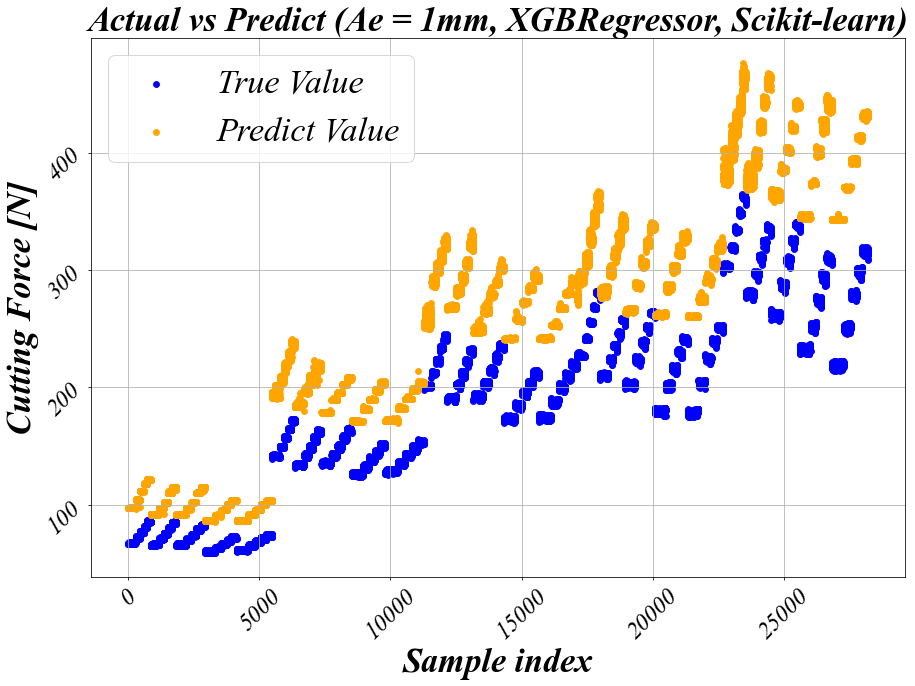

In [17]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 1mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

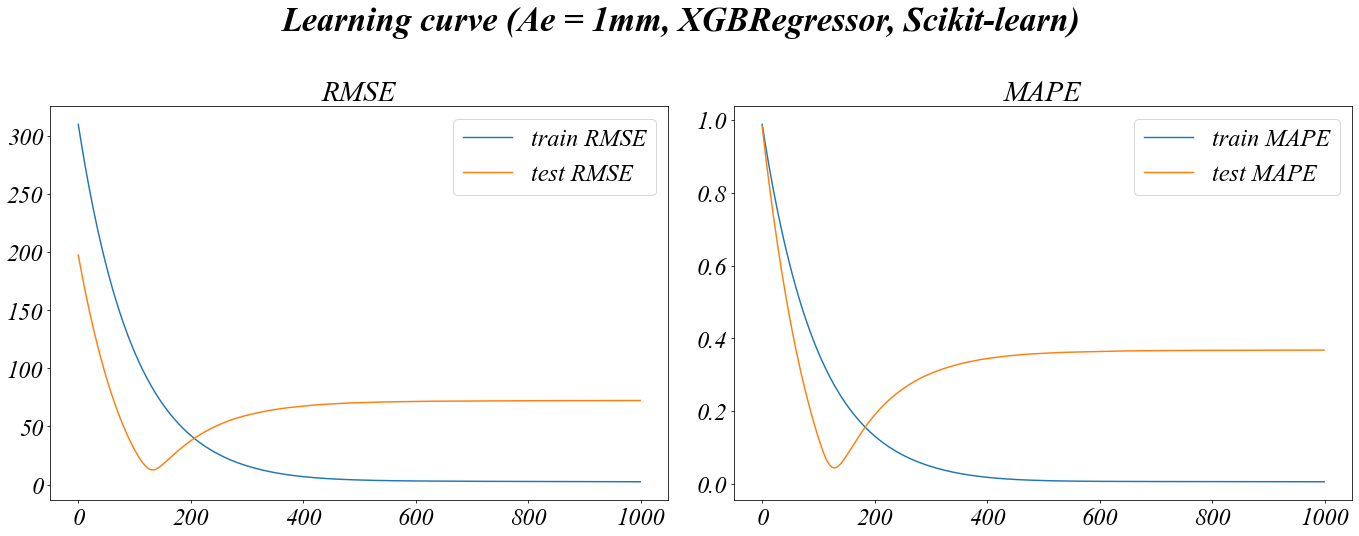

In [18]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ae = 1mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ae 1mm_cycle.png")

## Ae 2 test

In [26]:
train = pd.concat([ae_1, ae_3, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [27]:
X_test = ae_2.iloc[: , 1:]
y_test = ae_2['RMS_CF_max']

In [28]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [29]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:290.62196	validation_0-mape:0.98742	validation_1-rmse:273.83919	validation_1-mape:0.98715
[1]	validation_0-rmse:287.73222	validation_0-mape:0.97749	validation_1-rmse:271.00920	validation_1-mape:0.97674
[2]	validation_0-rmse:284.87142	validation_0-mape:0.96767	validation_1-rmse:268.20765	validation_1-mape:0.96642
[3]	validation_0-rmse:282.03980	validation_0-mape:0.95794	validation_1-rmse:265.45012	validation_1-mape:0.95631
[4]	validation_0-rmse:279.23620	validation_0-mape:0.94831	validation_1-rmse:262.70463	validation_1-mape:0.94620
[5]	validation_0-rmse:276.46116	validation_0-mape:0.93878	validation_1-rmse:260.00256	validation_1-mape:0.93629
[6]	validation_0-rmse:273.71358	validation_0-mape:0.92934	validation_1-rmse:257.31224	validation_1-mape:0.92638
[7]	validation_0-rmse:270.99345	validation_0-mape:0.91999	validation_1-rmse:254.67522	validation_1-mape:0.91674
[8]	validation_0-rmse:268.29919	validation_0-mape:0.91075	validation_1-rmse:252.03736	validation_1-mape:

[73]	validation_0-rmse:140.29450	validation_0-mape:0.47223	validation_1-rmse:124.38407	validation_1-mape:0.43616
[74]	validation_0-rmse:138.90722	validation_0-mape:0.46748	validation_1-rmse:123.08385	validation_1-mape:0.43117
[75]	validation_0-rmse:137.53373	validation_0-mape:0.46276	validation_1-rmse:121.78835	validation_1-mape:0.42617
[76]	validation_0-rmse:136.17216	validation_0-mape:0.45811	validation_1-rmse:120.47321	validation_1-mape:0.42117
[77]	validation_0-rmse:134.82568	validation_0-mape:0.45349	validation_1-rmse:119.17040	validation_1-mape:0.41625
[78]	validation_0-rmse:133.49220	validation_0-mape:0.44892	validation_1-rmse:117.91077	validation_1-mape:0.41157
[79]	validation_0-rmse:132.17290	validation_0-mape:0.44440	validation_1-rmse:116.64475	validation_1-mape:0.40672
[80]	validation_0-rmse:130.86602	validation_0-mape:0.43992	validation_1-rmse:115.42862	validation_1-mape:0.40216
[81]	validation_0-rmse:129.57296	validation_0-mape:0.43549	validation_1-rmse:114.18573	validatio

[146]	validation_0-rmse:68.08323	validation_0-mape:0.22558	validation_1-rmse:55.98286	validation_1-mape:0.17366
[147]	validation_0-rmse:67.41467	validation_0-mape:0.22331	validation_1-rmse:55.32087	validation_1-mape:0.17107
[148]	validation_0-rmse:66.75366	validation_0-mape:0.22106	validation_1-rmse:54.67241	validation_1-mape:0.16853
[149]	validation_0-rmse:66.09904	validation_0-mape:0.21884	validation_1-rmse:54.04816	validation_1-mape:0.16602
[150]	validation_0-rmse:65.45021	validation_0-mape:0.21664	validation_1-rmse:53.41642	validation_1-mape:0.16352
[151]	validation_0-rmse:64.80903	validation_0-mape:0.21446	validation_1-rmse:52.79182	validation_1-mape:0.16105
[152]	validation_0-rmse:64.17409	validation_0-mape:0.21230	validation_1-rmse:52.24114	validation_1-mape:0.15876
[153]	validation_0-rmse:63.54463	validation_0-mape:0.21017	validation_1-rmse:51.63381	validation_1-mape:0.15632
[154]	validation_0-rmse:62.92244	validation_0-mape:0.20806	validation_1-rmse:51.08767	validation_1-mape:

[220]	validation_0-rmse:33.10736	validation_0-mape:0.10686	validation_1-rmse:27.68007	validation_1-mape:0.05936
[221]	validation_0-rmse:32.79229	validation_0-mape:0.10579	validation_1-rmse:27.51192	validation_1-mape:0.05901
[222]	validation_0-rmse:32.48025	validation_0-mape:0.10473	validation_1-rmse:27.33418	validation_1-mape:0.05866
[223]	validation_0-rmse:32.17138	validation_0-mape:0.10369	validation_1-rmse:27.15545	validation_1-mape:0.05834
[224]	validation_0-rmse:31.86538	validation_0-mape:0.10265	validation_1-rmse:26.98887	validation_1-mape:0.05803
[225]	validation_0-rmse:31.56384	validation_0-mape:0.10162	validation_1-rmse:26.83539	validation_1-mape:0.05780
[226]	validation_0-rmse:31.26555	validation_0-mape:0.10061	validation_1-rmse:26.68585	validation_1-mape:0.05759
[227]	validation_0-rmse:30.96887	validation_0-mape:0.09960	validation_1-rmse:26.53500	validation_1-mape:0.05737
[228]	validation_0-rmse:30.67526	validation_0-mape:0.09860	validation_1-rmse:26.37566	validation_1-mape:

[294]	validation_0-rmse:16.75567	validation_0-mape:0.05141	validation_1-rmse:22.02209	validation_1-mape:0.06149
[295]	validation_0-rmse:16.61183	validation_0-mape:0.05092	validation_1-rmse:22.01163	validation_1-mape:0.06162
[296]	validation_0-rmse:16.46972	validation_0-mape:0.05044	validation_1-rmse:22.01211	validation_1-mape:0.06179
[297]	validation_0-rmse:16.32981	validation_0-mape:0.04996	validation_1-rmse:22.01592	validation_1-mape:0.06194
[298]	validation_0-rmse:16.18934	validation_0-mape:0.04948	validation_1-rmse:22.01217	validation_1-mape:0.06209
[299]	validation_0-rmse:16.05122	validation_0-mape:0.04901	validation_1-rmse:22.02393	validation_1-mape:0.06229
[300]	validation_0-rmse:15.91363	validation_0-mape:0.04854	validation_1-rmse:22.01784	validation_1-mape:0.06246
[301]	validation_0-rmse:15.77810	validation_0-mape:0.04808	validation_1-rmse:22.02459	validation_1-mape:0.06263
[302]	validation_0-rmse:15.64397	validation_0-mape:0.04762	validation_1-rmse:22.02179	validation_1-mape:

[368]	validation_0-rmse:9.35822	validation_0-mape:0.02652	validation_1-rmse:22.92786	validation_1-mape:0.07275
[369]	validation_0-rmse:9.29591	validation_0-mape:0.02631	validation_1-rmse:22.94693	validation_1-mape:0.07288
[370]	validation_0-rmse:9.23373	validation_0-mape:0.02611	validation_1-rmse:22.96822	validation_1-mape:0.07301
[371]	validation_0-rmse:9.17299	validation_0-mape:0.02590	validation_1-rmse:22.99835	validation_1-mape:0.07315
[372]	validation_0-rmse:9.11253	validation_0-mape:0.02570	validation_1-rmse:23.02419	validation_1-mape:0.07327
[373]	validation_0-rmse:9.05333	validation_0-mape:0.02551	validation_1-rmse:23.04118	validation_1-mape:0.07338
[374]	validation_0-rmse:8.99384	validation_0-mape:0.02531	validation_1-rmse:23.06983	validation_1-mape:0.07352
[375]	validation_0-rmse:8.93600	validation_0-mape:0.02512	validation_1-rmse:23.09618	validation_1-mape:0.07365
[376]	validation_0-rmse:8.87841	validation_0-mape:0.02493	validation_1-rmse:23.12266	validation_1-mape:0.07379
[

[442]	validation_0-rmse:6.31958	validation_0-mape:0.01677	validation_1-rmse:24.55869	validation_1-mape:0.08034
[443]	validation_0-rmse:6.29551	validation_0-mape:0.01670	validation_1-rmse:24.57365	validation_1-mape:0.08041
[444]	validation_0-rmse:6.27121	validation_0-mape:0.01663	validation_1-rmse:24.59353	validation_1-mape:0.08050
[445]	validation_0-rmse:6.24729	validation_0-mape:0.01655	validation_1-rmse:24.61088	validation_1-mape:0.08058
[446]	validation_0-rmse:6.22451	validation_0-mape:0.01648	validation_1-rmse:24.62486	validation_1-mape:0.08064
[447]	validation_0-rmse:6.20179	validation_0-mape:0.01642	validation_1-rmse:24.63967	validation_1-mape:0.08071
[448]	validation_0-rmse:6.17798	validation_0-mape:0.01635	validation_1-rmse:24.65469	validation_1-mape:0.08077
[449]	validation_0-rmse:6.15522	validation_0-mape:0.01628	validation_1-rmse:24.67058	validation_1-mape:0.08084
[450]	validation_0-rmse:6.13347	validation_0-mape:0.01621	validation_1-rmse:24.68528	validation_1-mape:0.08091
[

[516]	validation_0-rmse:5.15341	validation_0-mape:0.01344	validation_1-rmse:25.46858	validation_1-mape:0.08426
[517]	validation_0-rmse:5.14427	validation_0-mape:0.01342	validation_1-rmse:25.47971	validation_1-mape:0.08431
[518]	validation_0-rmse:5.13579	validation_0-mape:0.01340	validation_1-rmse:25.48534	validation_1-mape:0.08434
[519]	validation_0-rmse:5.12640	validation_0-mape:0.01337	validation_1-rmse:25.49779	validation_1-mape:0.08438
[520]	validation_0-rmse:5.11747	validation_0-mape:0.01335	validation_1-rmse:25.50317	validation_1-mape:0.08442
[521]	validation_0-rmse:5.10882	validation_0-mape:0.01332	validation_1-rmse:25.51753	validation_1-mape:0.08446
[522]	validation_0-rmse:5.10062	validation_0-mape:0.01330	validation_1-rmse:25.52477	validation_1-mape:0.08449
[523]	validation_0-rmse:5.09216	validation_0-mape:0.01328	validation_1-rmse:25.53547	validation_1-mape:0.08453
[524]	validation_0-rmse:5.08305	validation_0-mape:0.01325	validation_1-rmse:25.54197	validation_1-mape:0.08456
[

[590]	validation_0-rmse:4.65628	validation_0-mape:0.01225	validation_1-rmse:26.00463	validation_1-mape:0.08663
[591]	validation_0-rmse:4.65174	validation_0-mape:0.01224	validation_1-rmse:26.00814	validation_1-mape:0.08664
[592]	validation_0-rmse:4.64571	validation_0-mape:0.01223	validation_1-rmse:26.01741	validation_1-mape:0.08668
[593]	validation_0-rmse:4.63995	validation_0-mape:0.01222	validation_1-rmse:26.03055	validation_1-mape:0.08673
[594]	validation_0-rmse:4.63465	validation_0-mape:0.01221	validation_1-rmse:26.03362	validation_1-mape:0.08675
[595]	validation_0-rmse:4.62847	validation_0-mape:0.01219	validation_1-rmse:26.03456	validation_1-mape:0.08677
[596]	validation_0-rmse:4.62427	validation_0-mape:0.01218	validation_1-rmse:26.04368	validation_1-mape:0.08680
[597]	validation_0-rmse:4.61864	validation_0-mape:0.01217	validation_1-rmse:26.04685	validation_1-mape:0.08683
[598]	validation_0-rmse:4.61336	validation_0-mape:0.01216	validation_1-rmse:26.04663	validation_1-mape:0.08684
[

[664]	validation_0-rmse:4.35870	validation_0-mape:0.01166	validation_1-rmse:26.49248	validation_1-mape:0.08829
[665]	validation_0-rmse:4.35598	validation_0-mape:0.01165	validation_1-rmse:26.49307	validation_1-mape:0.08830
[666]	validation_0-rmse:4.35304	validation_0-mape:0.01165	validation_1-rmse:26.50693	validation_1-mape:0.08834
[667]	validation_0-rmse:4.35072	validation_0-mape:0.01164	validation_1-rmse:26.50931	validation_1-mape:0.08834
[668]	validation_0-rmse:4.34780	validation_0-mape:0.01164	validation_1-rmse:26.51264	validation_1-mape:0.08835
[669]	validation_0-rmse:4.34475	validation_0-mape:0.01163	validation_1-rmse:26.52681	validation_1-mape:0.08839
[670]	validation_0-rmse:4.34216	validation_0-mape:0.01162	validation_1-rmse:26.52788	validation_1-mape:0.08840
[671]	validation_0-rmse:4.33930	validation_0-mape:0.01162	validation_1-rmse:26.53122	validation_1-mape:0.08840
[672]	validation_0-rmse:4.33645	validation_0-mape:0.01161	validation_1-rmse:26.53271	validation_1-mape:0.08841
[

[738]	validation_0-rmse:4.16870	validation_0-mape:0.01125	validation_1-rmse:26.79399	validation_1-mape:0.08935
[739]	validation_0-rmse:4.16544	validation_0-mape:0.01125	validation_1-rmse:26.79350	validation_1-mape:0.08935
[740]	validation_0-rmse:4.16343	validation_0-mape:0.01124	validation_1-rmse:26.79295	validation_1-mape:0.08935
[741]	validation_0-rmse:4.16188	validation_0-mape:0.01123	validation_1-rmse:26.80578	validation_1-mape:0.08938
[742]	validation_0-rmse:4.15963	validation_0-mape:0.01123	validation_1-rmse:26.80914	validation_1-mape:0.08939
[743]	validation_0-rmse:4.15677	validation_0-mape:0.01122	validation_1-rmse:26.80929	validation_1-mape:0.08939
[744]	validation_0-rmse:4.15356	validation_0-mape:0.01122	validation_1-rmse:26.81781	validation_1-mape:0.08943
[745]	validation_0-rmse:4.15156	validation_0-mape:0.01121	validation_1-rmse:26.82035	validation_1-mape:0.08944
[746]	validation_0-rmse:4.14881	validation_0-mape:0.01121	validation_1-rmse:26.82134	validation_1-mape:0.08944
[

[812]	validation_0-rmse:4.01552	validation_0-mape:0.01089	validation_1-rmse:26.94334	validation_1-mape:0.08991
[813]	validation_0-rmse:4.01321	validation_0-mape:0.01088	validation_1-rmse:26.94813	validation_1-mape:0.08993
[814]	validation_0-rmse:4.01096	validation_0-mape:0.01088	validation_1-rmse:26.95219	validation_1-mape:0.08995
[815]	validation_0-rmse:4.00914	validation_0-mape:0.01088	validation_1-rmse:26.95440	validation_1-mape:0.08995
[816]	validation_0-rmse:4.00698	validation_0-mape:0.01087	validation_1-rmse:26.95042	validation_1-mape:0.08995
[817]	validation_0-rmse:4.00542	validation_0-mape:0.01086	validation_1-rmse:26.95065	validation_1-mape:0.08995
[818]	validation_0-rmse:4.00382	validation_0-mape:0.01086	validation_1-rmse:26.94607	validation_1-mape:0.08994
[819]	validation_0-rmse:4.00159	validation_0-mape:0.01086	validation_1-rmse:26.95159	validation_1-mape:0.08997
[820]	validation_0-rmse:3.99929	validation_0-mape:0.01085	validation_1-rmse:26.95367	validation_1-mape:0.08997
[

[886]	validation_0-rmse:3.87558	validation_0-mape:0.01055	validation_1-rmse:26.98193	validation_1-mape:0.09020
[887]	validation_0-rmse:3.87340	validation_0-mape:0.01055	validation_1-rmse:26.98210	validation_1-mape:0.09020
[888]	validation_0-rmse:3.87155	validation_0-mape:0.01054	validation_1-rmse:26.98165	validation_1-mape:0.09020
[889]	validation_0-rmse:3.86934	validation_0-mape:0.01053	validation_1-rmse:26.98251	validation_1-mape:0.09020
[890]	validation_0-rmse:3.86765	validation_0-mape:0.01053	validation_1-rmse:26.98353	validation_1-mape:0.09021
[891]	validation_0-rmse:3.86603	validation_0-mape:0.01053	validation_1-rmse:26.98632	validation_1-mape:0.09022
[892]	validation_0-rmse:3.86446	validation_0-mape:0.01052	validation_1-rmse:26.98551	validation_1-mape:0.09022
[893]	validation_0-rmse:3.86317	validation_0-mape:0.01052	validation_1-rmse:26.98571	validation_1-mape:0.09022
[894]	validation_0-rmse:3.86103	validation_0-mape:0.01051	validation_1-rmse:26.98582	validation_1-mape:0.09022
[

[960]	validation_0-rmse:3.74944	validation_0-mape:0.01023	validation_1-rmse:27.02504	validation_1-mape:0.09040
[961]	validation_0-rmse:3.74739	validation_0-mape:0.01023	validation_1-rmse:27.02937	validation_1-mape:0.09041
[962]	validation_0-rmse:3.74591	validation_0-mape:0.01022	validation_1-rmse:27.02817	validation_1-mape:0.09041
[963]	validation_0-rmse:3.74373	validation_0-mape:0.01022	validation_1-rmse:27.03205	validation_1-mape:0.09043
[964]	validation_0-rmse:3.74165	validation_0-mape:0.01021	validation_1-rmse:27.03235	validation_1-mape:0.09043
[965]	validation_0-rmse:3.74005	validation_0-mape:0.01021	validation_1-rmse:27.03462	validation_1-mape:0.09044
[966]	validation_0-rmse:3.73831	validation_0-mape:0.01020	validation_1-rmse:27.03442	validation_1-mape:0.09044
[967]	validation_0-rmse:3.73653	validation_0-mape:0.01020	validation_1-rmse:27.03435	validation_1-mape:0.09044
[968]	validation_0-rmse:3.73454	validation_0-mape:0.01019	validation_1-rmse:27.03407	validation_1-mape:0.09044
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [30]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.6863
Train MAPE: 1.0075
Test RMSE: 27.0496
Test MAPE: 9.0517


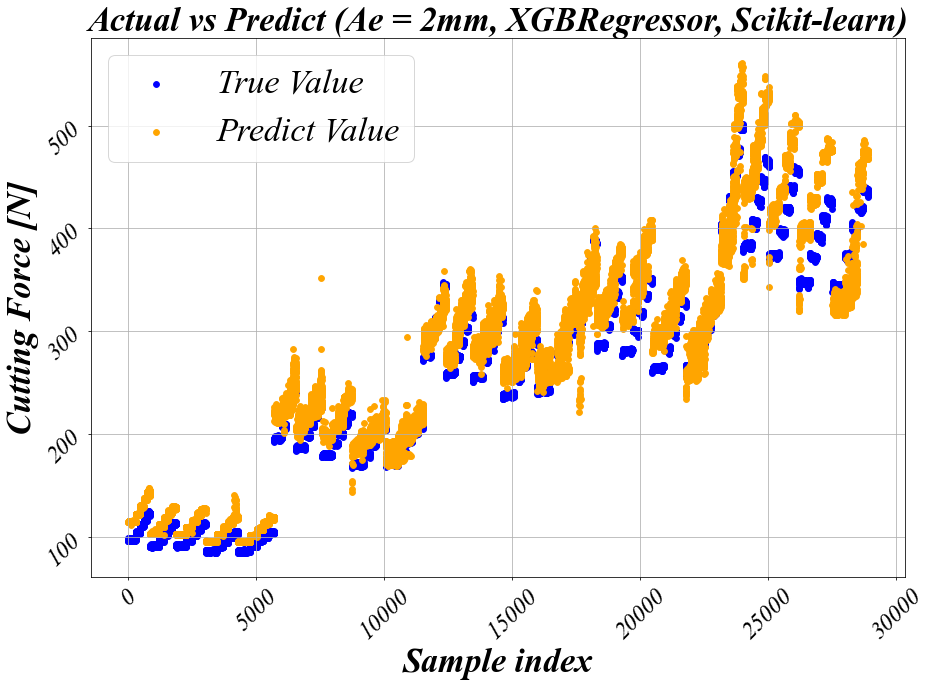

In [31]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 2mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

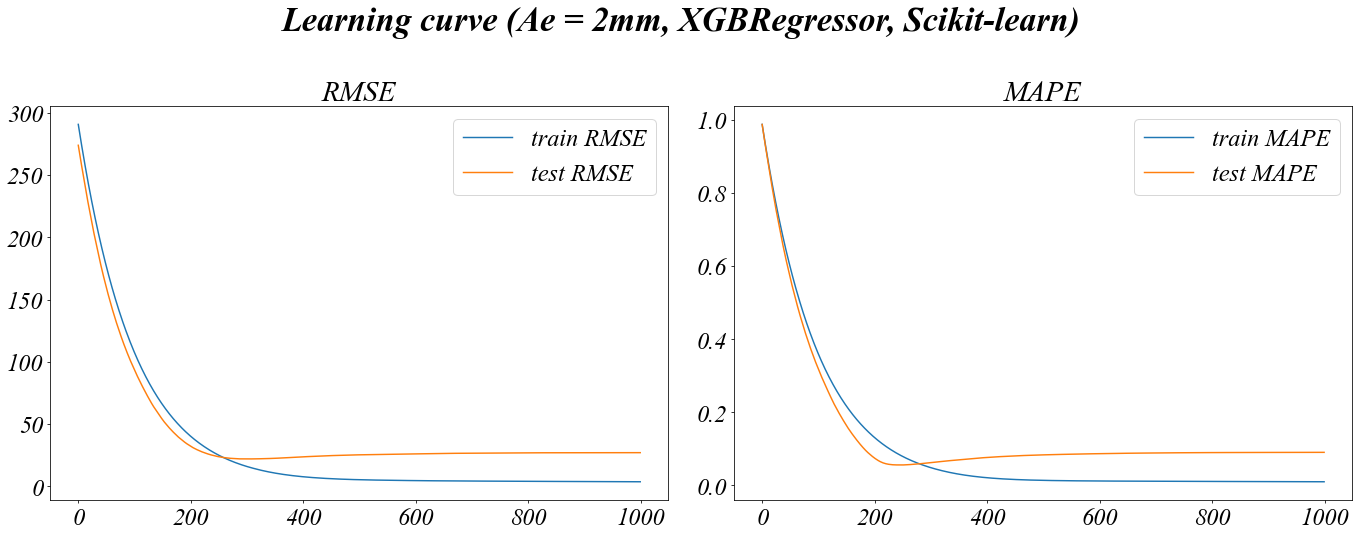

In [32]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ae = 2mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ae 2mm_cycle.png")

## Ae 3 test

In [33]:
train = pd.concat([ae_1, ae_2, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [34]:
X_test = ae_3.iloc[: , 1:]
y_test = ae_3['RMS_CF_max']

In [35]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [36]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:276.38993	validation_0-mape:0.98731	validation_1-rmse:314.63075	validation_1-mape:0.98817
[1]	validation_0-rmse:273.64390	validation_0-mape:0.97739	validation_1-rmse:311.63228	validation_1-mape:0.97862
[2]	validation_0-rmse:270.92605	validation_0-mape:0.96756	validation_1-rmse:308.67408	validation_1-mape:0.96917
[3]	validation_0-rmse:268.23557	validation_0-mape:0.95783	validation_1-rmse:305.73220	validation_1-mape:0.95980
[4]	validation_0-rmse:265.57125	validation_0-mape:0.94820	validation_1-rmse:302.80877	validation_1-mape:0.95050
[5]	validation_0-rmse:262.93336	validation_0-mape:0.93867	validation_1-rmse:299.89381	validation_1-mape:0.94124
[6]	validation_0-rmse:260.32048	validation_0-mape:0.92924	validation_1-rmse:296.90352	validation_1-mape:0.93196
[7]	validation_0-rmse:257.73518	validation_0-mape:0.91990	validation_1-rmse:294.06679	validation_1-mape:0.92291
[8]	validation_0-rmse:255.17441	validation_0-mape:0.91065	validation_1-rmse:291.13548	validation_1-mape:

[73]	validation_0-rmse:133.63615	validation_0-mape:0.47159	validation_1-rmse:153.81263	validation_1-mape:0.48266
[74]	validation_0-rmse:132.31851	validation_0-mape:0.46683	validation_1-rmse:152.37514	validation_1-mape:0.47811
[75]	validation_0-rmse:131.01088	validation_0-mape:0.46212	validation_1-rmse:150.92076	validation_1-mape:0.47347
[76]	validation_0-rmse:129.71923	validation_0-mape:0.45746	validation_1-rmse:149.50334	validation_1-mape:0.46893
[77]	validation_0-rmse:128.43803	validation_0-mape:0.45285	validation_1-rmse:148.10375	validation_1-mape:0.46449
[78]	validation_0-rmse:127.16937	validation_0-mape:0.44829	validation_1-rmse:146.69402	validation_1-mape:0.45999
[79]	validation_0-rmse:125.91322	validation_0-mape:0.44378	validation_1-rmse:145.30832	validation_1-mape:0.45561
[80]	validation_0-rmse:124.67135	validation_0-mape:0.43930	validation_1-rmse:143.88924	validation_1-mape:0.45117
[81]	validation_0-rmse:123.44264	validation_0-mape:0.43487	validation_1-rmse:142.49063	validatio

[146]	validation_0-rmse:65.03723	validation_0-mape:0.22504	validation_1-rmse:77.25403	validation_1-mape:0.23993
[147]	validation_0-rmse:64.40554	validation_0-mape:0.22277	validation_1-rmse:76.56593	validation_1-mape:0.23774
[148]	validation_0-rmse:63.77951	validation_0-mape:0.22052	validation_1-rmse:75.85444	validation_1-mape:0.23550
[149]	validation_0-rmse:63.15709	validation_0-mape:0.21830	validation_1-rmse:75.14494	validation_1-mape:0.23328
[150]	validation_0-rmse:62.54086	validation_0-mape:0.21610	validation_1-rmse:74.44762	validation_1-mape:0.23110
[151]	validation_0-rmse:61.93189	validation_0-mape:0.21392	validation_1-rmse:73.78901	validation_1-mape:0.22901
[152]	validation_0-rmse:61.32904	validation_0-mape:0.21177	validation_1-rmse:73.11198	validation_1-mape:0.22682
[153]	validation_0-rmse:60.73197	validation_0-mape:0.20963	validation_1-rmse:72.42970	validation_1-mape:0.22464
[154]	validation_0-rmse:60.14115	validation_0-mape:0.20752	validation_1-rmse:71.75919	validation_1-mape:

[220]	validation_0-rmse:31.66158	validation_0-mape:0.10669	validation_1-rmse:37.97356	validation_1-mape:0.11571
[221]	validation_0-rmse:31.35988	validation_0-mape:0.10562	validation_1-rmse:37.60740	validation_1-mape:0.11453
[222]	validation_0-rmse:31.06132	validation_0-mape:0.10457	validation_1-rmse:37.24129	validation_1-mape:0.11335
[223]	validation_0-rmse:30.76579	validation_0-mape:0.10352	validation_1-rmse:36.88358	validation_1-mape:0.11220
[224]	validation_0-rmse:30.47347	validation_0-mape:0.10249	validation_1-rmse:36.52051	validation_1-mape:0.11103
[225]	validation_0-rmse:30.18404	validation_0-mape:0.10146	validation_1-rmse:36.17141	validation_1-mape:0.10991
[226]	validation_0-rmse:29.89768	validation_0-mape:0.10045	validation_1-rmse:35.82083	validation_1-mape:0.10879
[227]	validation_0-rmse:29.61436	validation_0-mape:0.09945	validation_1-rmse:35.49131	validation_1-mape:0.10773
[228]	validation_0-rmse:29.33415	validation_0-mape:0.09845	validation_1-rmse:35.15079	validation_1-mape:

[294]	validation_0-rmse:16.06984	validation_0-mape:0.05118	validation_1-rmse:19.69693	validation_1-mape:0.05705
[295]	validation_0-rmse:15.93296	validation_0-mape:0.05068	validation_1-rmse:19.55690	validation_1-mape:0.05658
[296]	validation_0-rmse:15.79723	validation_0-mape:0.05019	validation_1-rmse:19.40457	validation_1-mape:0.05610
[297]	validation_0-rmse:15.66307	validation_0-mape:0.04971	validation_1-rmse:19.25191	validation_1-mape:0.05561
[298]	validation_0-rmse:15.52994	validation_0-mape:0.04923	validation_1-rmse:19.10813	validation_1-mape:0.05515
[299]	validation_0-rmse:15.39863	validation_0-mape:0.04876	validation_1-rmse:18.96363	validation_1-mape:0.05468
[300]	validation_0-rmse:15.26866	validation_0-mape:0.04829	validation_1-rmse:18.82567	validation_1-mape:0.05424
[301]	validation_0-rmse:15.14037	validation_0-mape:0.04783	validation_1-rmse:18.69781	validation_1-mape:0.05381
[302]	validation_0-rmse:15.01310	validation_0-mape:0.04738	validation_1-rmse:18.56325	validation_1-mape:

[368]	validation_0-rmse:9.14214	validation_0-mape:0.02660	validation_1-rmse:12.34719	validation_1-mape:0.03417
[369]	validation_0-rmse:9.08421	validation_0-mape:0.02640	validation_1-rmse:12.30030	validation_1-mape:0.03402
[370]	validation_0-rmse:9.02657	validation_0-mape:0.02621	validation_1-rmse:12.23880	validation_1-mape:0.03385
[371]	validation_0-rmse:8.96968	validation_0-mape:0.02601	validation_1-rmse:12.18563	validation_1-mape:0.03370
[372]	validation_0-rmse:8.91365	validation_0-mape:0.02582	validation_1-rmse:12.13054	validation_1-mape:0.03354
[373]	validation_0-rmse:8.85834	validation_0-mape:0.02563	validation_1-rmse:12.06883	validation_1-mape:0.03336
[374]	validation_0-rmse:8.80392	validation_0-mape:0.02545	validation_1-rmse:12.02456	validation_1-mape:0.03323
[375]	validation_0-rmse:8.74999	validation_0-mape:0.02526	validation_1-rmse:11.97595	validation_1-mape:0.03309
[376]	validation_0-rmse:8.69664	validation_0-mape:0.02508	validation_1-rmse:11.92748	validation_1-mape:0.03294
[

[442]	validation_0-rmse:6.36631	validation_0-mape:0.01734	validation_1-rmse:10.09055	validation_1-mape:0.02738
[443]	validation_0-rmse:6.34428	validation_0-mape:0.01727	validation_1-rmse:10.08141	validation_1-mape:0.02735
[444]	validation_0-rmse:6.32237	validation_0-mape:0.01720	validation_1-rmse:10.06783	validation_1-mape:0.02731
[445]	validation_0-rmse:6.30071	validation_0-mape:0.01713	validation_1-rmse:10.05389	validation_1-mape:0.02727
[446]	validation_0-rmse:6.27937	validation_0-mape:0.01707	validation_1-rmse:10.04416	validation_1-mape:0.02724
[447]	validation_0-rmse:6.25907	validation_0-mape:0.01700	validation_1-rmse:10.03443	validation_1-mape:0.02721
[448]	validation_0-rmse:6.23917	validation_0-mape:0.01694	validation_1-rmse:10.01975	validation_1-mape:0.02717
[449]	validation_0-rmse:6.21865	validation_0-mape:0.01688	validation_1-rmse:10.01073	validation_1-mape:0.02714
[450]	validation_0-rmse:6.19872	validation_0-mape:0.01681	validation_1-rmse:10.00070	validation_1-mape:0.02711
[

[517]	validation_0-rmse:5.29703	validation_0-mape:0.01414	validation_1-rmse:9.63796	validation_1-mape:0.02603
[518]	validation_0-rmse:5.28860	validation_0-mape:0.01411	validation_1-rmse:9.63766	validation_1-mape:0.02603
[519]	validation_0-rmse:5.27850	validation_0-mape:0.01409	validation_1-rmse:9.63586	validation_1-mape:0.02602
[520]	validation_0-rmse:5.26950	validation_0-mape:0.01406	validation_1-rmse:9.63489	validation_1-mape:0.02601
[521]	validation_0-rmse:5.25954	validation_0-mape:0.01404	validation_1-rmse:9.63132	validation_1-mape:0.02600
[522]	validation_0-rmse:5.25125	validation_0-mape:0.01401	validation_1-rmse:9.63192	validation_1-mape:0.02600
[523]	validation_0-rmse:5.24414	validation_0-mape:0.01399	validation_1-rmse:9.62572	validation_1-mape:0.02598
[524]	validation_0-rmse:5.23467	validation_0-mape:0.01397	validation_1-rmse:9.62393	validation_1-mape:0.02597
[525]	validation_0-rmse:5.22602	validation_0-mape:0.01395	validation_1-rmse:9.62139	validation_1-mape:0.02597
[526]	vali

[592]	validation_0-rmse:4.82767	validation_0-mape:0.01300	validation_1-rmse:9.54510	validation_1-mape:0.02571
[593]	validation_0-rmse:4.82296	validation_0-mape:0.01299	validation_1-rmse:9.54354	validation_1-mape:0.02571
[594]	validation_0-rmse:4.81844	validation_0-mape:0.01298	validation_1-rmse:9.54433	validation_1-mape:0.02571
[595]	validation_0-rmse:4.81419	validation_0-mape:0.01297	validation_1-rmse:9.54392	validation_1-mape:0.02571
[596]	validation_0-rmse:4.80863	validation_0-mape:0.01296	validation_1-rmse:9.54386	validation_1-mape:0.02571
[597]	validation_0-rmse:4.80518	validation_0-mape:0.01295	validation_1-rmse:9.54300	validation_1-mape:0.02570
[598]	validation_0-rmse:4.80086	validation_0-mape:0.01294	validation_1-rmse:9.54391	validation_1-mape:0.02570
[599]	validation_0-rmse:4.79667	validation_0-mape:0.01293	validation_1-rmse:9.54502	validation_1-mape:0.02571
[600]	validation_0-rmse:4.79203	validation_0-mape:0.01293	validation_1-rmse:9.54477	validation_1-mape:0.02570
[601]	vali

[667]	validation_0-rmse:4.56008	validation_0-mape:0.01241	validation_1-rmse:9.51026	validation_1-mape:0.02562
[668]	validation_0-rmse:4.55685	validation_0-mape:0.01240	validation_1-rmse:9.50613	validation_1-mape:0.02561
[669]	validation_0-rmse:4.55413	validation_0-mape:0.01240	validation_1-rmse:9.50703	validation_1-mape:0.02561
[670]	validation_0-rmse:4.55059	validation_0-mape:0.01239	validation_1-rmse:9.50661	validation_1-mape:0.02561
[671]	validation_0-rmse:4.54736	validation_0-mape:0.01238	validation_1-rmse:9.50588	validation_1-mape:0.02561
[672]	validation_0-rmse:4.54379	validation_0-mape:0.01238	validation_1-rmse:9.50495	validation_1-mape:0.02560
[673]	validation_0-rmse:4.54128	validation_0-mape:0.01237	validation_1-rmse:9.50593	validation_1-mape:0.02561
[674]	validation_0-rmse:4.53866	validation_0-mape:0.01236	validation_1-rmse:9.50564	validation_1-mape:0.02561
[675]	validation_0-rmse:4.53501	validation_0-mape:0.01235	validation_1-rmse:9.50441	validation_1-mape:0.02560
[676]	vali

[742]	validation_0-rmse:4.36726	validation_0-mape:0.01198	validation_1-rmse:9.49702	validation_1-mape:0.02557
[743]	validation_0-rmse:4.36552	validation_0-mape:0.01197	validation_1-rmse:9.49720	validation_1-mape:0.02557
[744]	validation_0-rmse:4.36203	validation_0-mape:0.01197	validation_1-rmse:9.49407	validation_1-mape:0.02556
[745]	validation_0-rmse:4.36026	validation_0-mape:0.01196	validation_1-rmse:9.49516	validation_1-mape:0.02556
[746]	validation_0-rmse:4.35785	validation_0-mape:0.01196	validation_1-rmse:9.49432	validation_1-mape:0.02556
[747]	validation_0-rmse:4.35559	validation_0-mape:0.01195	validation_1-rmse:9.49409	validation_1-mape:0.02556
[748]	validation_0-rmse:4.35361	validation_0-mape:0.01195	validation_1-rmse:9.49503	validation_1-mape:0.02556
[749]	validation_0-rmse:4.35146	validation_0-mape:0.01194	validation_1-rmse:9.49478	validation_1-mape:0.02556
[750]	validation_0-rmse:4.34978	validation_0-mape:0.01194	validation_1-rmse:9.49474	validation_1-mape:0.02556
[751]	vali

[817]	validation_0-rmse:4.20663	validation_0-mape:0.01162	validation_1-rmse:9.46094	validation_1-mape:0.02548
[818]	validation_0-rmse:4.20515	validation_0-mape:0.01162	validation_1-rmse:9.46145	validation_1-mape:0.02548
[819]	validation_0-rmse:4.20296	validation_0-mape:0.01161	validation_1-rmse:9.46063	validation_1-mape:0.02548
[820]	validation_0-rmse:4.20122	validation_0-mape:0.01161	validation_1-rmse:9.45907	validation_1-mape:0.02548
[821]	validation_0-rmse:4.19864	validation_0-mape:0.01160	validation_1-rmse:9.45553	validation_1-mape:0.02547
[822]	validation_0-rmse:4.19720	validation_0-mape:0.01160	validation_1-rmse:9.45576	validation_1-mape:0.02547
[823]	validation_0-rmse:4.19502	validation_0-mape:0.01160	validation_1-rmse:9.45418	validation_1-mape:0.02547
[824]	validation_0-rmse:4.19318	validation_0-mape:0.01159	validation_1-rmse:9.45680	validation_1-mape:0.02548
[825]	validation_0-rmse:4.19124	validation_0-mape:0.01159	validation_1-rmse:9.45656	validation_1-mape:0.02547
[826]	vali

[892]	validation_0-rmse:4.07287	validation_0-mape:0.01131	validation_1-rmse:9.44052	validation_1-mape:0.02541
[893]	validation_0-rmse:4.07125	validation_0-mape:0.01130	validation_1-rmse:9.43957	validation_1-mape:0.02540
[894]	validation_0-rmse:4.06935	validation_0-mape:0.01130	validation_1-rmse:9.44116	validation_1-mape:0.02541
[895]	validation_0-rmse:4.06815	validation_0-mape:0.01130	validation_1-rmse:9.44152	validation_1-mape:0.02541
[896]	validation_0-rmse:4.06634	validation_0-mape:0.01129	validation_1-rmse:9.44091	validation_1-mape:0.02540
[897]	validation_0-rmse:4.06505	validation_0-mape:0.01129	validation_1-rmse:9.43993	validation_1-mape:0.02540
[898]	validation_0-rmse:4.06324	validation_0-mape:0.01128	validation_1-rmse:9.43913	validation_1-mape:0.02540
[899]	validation_0-rmse:4.06197	validation_0-mape:0.01128	validation_1-rmse:9.43876	validation_1-mape:0.02540
[900]	validation_0-rmse:4.06061	validation_0-mape:0.01128	validation_1-rmse:9.43942	validation_1-mape:0.02540
[901]	vali

[967]	validation_0-rmse:3.94356	validation_0-mape:0.01099	validation_1-rmse:9.40890	validation_1-mape:0.02531
[968]	validation_0-rmse:3.94048	validation_0-mape:0.01099	validation_1-rmse:9.40787	validation_1-mape:0.02531
[969]	validation_0-rmse:3.93915	validation_0-mape:0.01098	validation_1-rmse:9.40819	validation_1-mape:0.02531
[970]	validation_0-rmse:3.93747	validation_0-mape:0.01098	validation_1-rmse:9.40858	validation_1-mape:0.02531
[971]	validation_0-rmse:3.93582	validation_0-mape:0.01097	validation_1-rmse:9.40795	validation_1-mape:0.02530
[972]	validation_0-rmse:3.93348	validation_0-mape:0.01097	validation_1-rmse:9.40389	validation_1-mape:0.02530
[973]	validation_0-rmse:3.93206	validation_0-mape:0.01097	validation_1-rmse:9.40427	validation_1-mape:0.02530
[974]	validation_0-rmse:3.93051	validation_0-mape:0.01096	validation_1-rmse:9.40346	validation_1-mape:0.02530
[975]	validation_0-rmse:3.92903	validation_0-mape:0.01096	validation_1-rmse:9.40339	validation_1-mape:0.02530
[976]	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [37]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.8915
Train MAPE: 1.0874
Test RMSE: 9.3899
Test MAPE: 2.5262


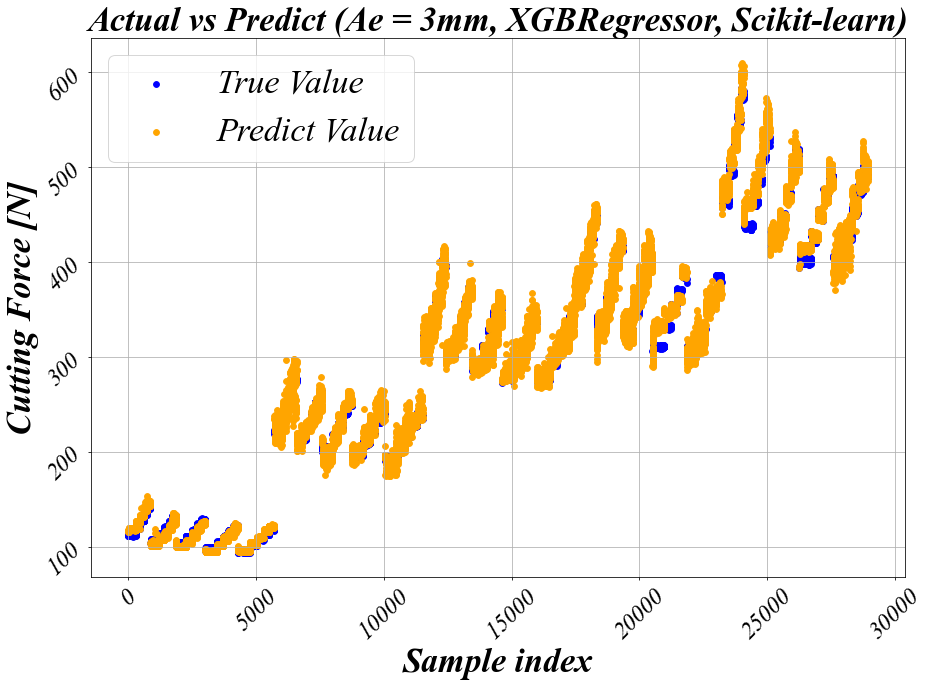

In [38]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 3mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

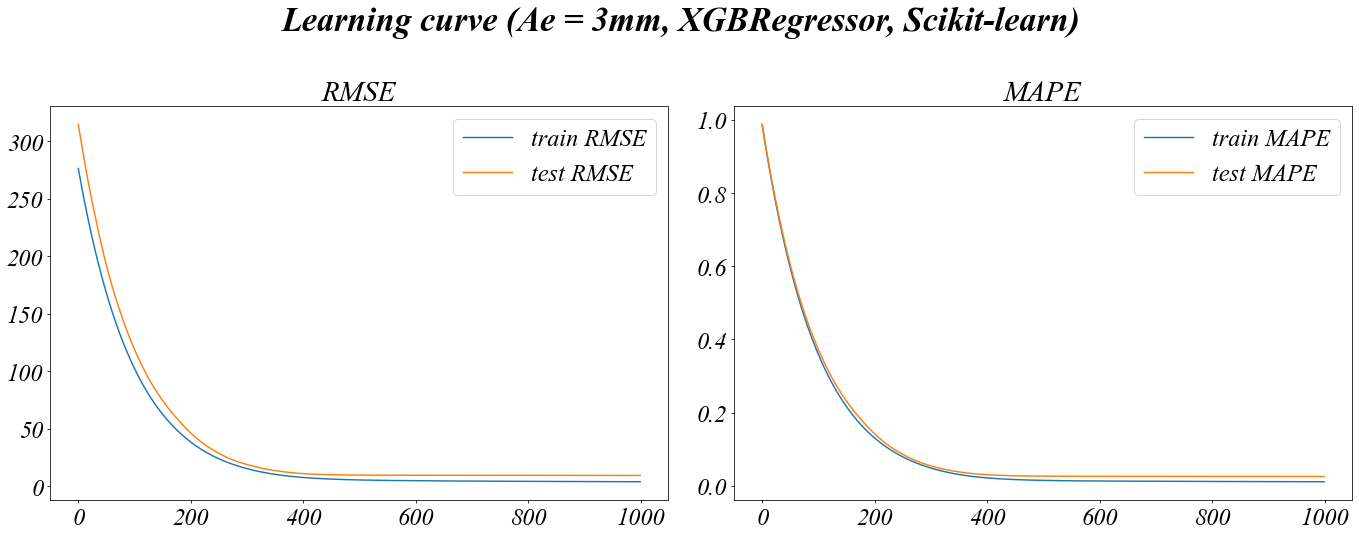

In [39]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ae = 3mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ae 3mm_cycle.png")

## Ae 4 test

In [40]:
train = pd.concat([ae_1, ae_2, ae_3], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [41]:
X_test = ae_4.iloc[: , 1:]
y_test = ae_4['RMS_CF_max']

In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [43]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:267.10272	validation_0-mape:0.98732	validation_1-rmse:338.62642	validation_1-mape:0.98833
[1]	validation_0-rmse:264.44392	validation_0-mape:0.97742	validation_1-rmse:335.43130	validation_1-mape:0.97883
[2]	validation_0-rmse:261.81181	validation_0-mape:0.96761	validation_1-rmse:332.26922	validation_1-mape:0.96943
[3]	validation_0-rmse:259.20600	validation_0-mape:0.95791	validation_1-rmse:329.13758	validation_1-mape:0.96012
[4]	validation_0-rmse:256.62644	validation_0-mape:0.94831	validation_1-rmse:326.03774	validation_1-mape:0.95090
[5]	validation_0-rmse:254.07378	validation_0-mape:0.93879	validation_1-rmse:322.92407	validation_1-mape:0.94169
[6]	validation_0-rmse:251.54574	validation_0-mape:0.92938	validation_1-rmse:319.88731	validation_1-mape:0.93265
[7]	validation_0-rmse:249.04400	validation_0-mape:0.92005	validation_1-rmse:316.83497	validation_1-mape:0.92362
[8]	validation_0-rmse:246.56552	validation_0-mape:0.91083	validation_1-rmse:313.82352	validation_1-mape:

[73]	validation_0-rmse:128.92984	validation_0-mape:0.47267	validation_1-rmse:170.42501	validation_1-mape:0.49032
[74]	validation_0-rmse:127.65202	validation_0-mape:0.46792	validation_1-rmse:168.88241	validation_1-mape:0.48568
[75]	validation_0-rmse:126.38792	validation_0-mape:0.46321	validation_1-rmse:167.31669	validation_1-mape:0.48107
[76]	validation_0-rmse:125.13557	validation_0-mape:0.45855	validation_1-rmse:165.80580	validation_1-mape:0.47652
[77]	validation_0-rmse:123.89725	validation_0-mape:0.45394	validation_1-rmse:164.25951	validation_1-mape:0.47200
[78]	validation_0-rmse:122.66980	validation_0-mape:0.44938	validation_1-rmse:162.78694	validation_1-mape:0.46757
[79]	validation_0-rmse:121.45539	validation_0-mape:0.44485	validation_1-rmse:161.32168	validation_1-mape:0.46314
[80]	validation_0-rmse:120.25387	validation_0-mape:0.44038	validation_1-rmse:159.79610	validation_1-mape:0.45869
[81]	validation_0-rmse:119.06221	validation_0-mape:0.43595	validation_1-rmse:158.36652	validatio

[146]	validation_0-rmse:62.51838	validation_0-mape:0.22577	validation_1-rmse:89.22623	validation_1-mape:0.24740
[147]	validation_0-rmse:61.90314	validation_0-mape:0.22350	validation_1-rmse:88.47324	validation_1-mape:0.24518
[148]	validation_0-rmse:61.29509	validation_0-mape:0.22125	validation_1-rmse:87.72952	validation_1-mape:0.24293
[149]	validation_0-rmse:60.69258	validation_0-mape:0.21902	validation_1-rmse:86.99387	validation_1-mape:0.24075
[150]	validation_0-rmse:60.09776	validation_0-mape:0.21681	validation_1-rmse:86.28037	validation_1-mape:0.23853
[151]	validation_0-rmse:59.50864	validation_0-mape:0.21462	validation_1-rmse:85.55262	validation_1-mape:0.23634
[152]	validation_0-rmse:58.92569	validation_0-mape:0.21245	validation_1-rmse:84.85092	validation_1-mape:0.23420
[153]	validation_0-rmse:58.34693	validation_0-mape:0.21032	validation_1-rmse:84.13819	validation_1-mape:0.23209
[154]	validation_0-rmse:57.77398	validation_0-mape:0.20820	validation_1-rmse:83.44274	validation_1-mape:

[220]	validation_0-rmse:30.33895	validation_0-mape:0.10660	validation_1-rmse:50.72187	validation_1-mape:0.13016
[221]	validation_0-rmse:30.04552	validation_0-mape:0.10553	validation_1-rmse:50.39026	validation_1-mape:0.12913
[222]	validation_0-rmse:29.75506	validation_0-mape:0.10447	validation_1-rmse:50.05894	validation_1-mape:0.12810
[223]	validation_0-rmse:29.46763	validation_0-mape:0.10342	validation_1-rmse:49.73723	validation_1-mape:0.12710
[224]	validation_0-rmse:29.18311	validation_0-mape:0.10239	validation_1-rmse:49.41500	validation_1-mape:0.12611
[225]	validation_0-rmse:28.90157	validation_0-mape:0.10136	validation_1-rmse:49.09284	validation_1-mape:0.12510
[226]	validation_0-rmse:28.62291	validation_0-mape:0.10034	validation_1-rmse:48.77984	validation_1-mape:0.12413
[227]	validation_0-rmse:28.34716	validation_0-mape:0.09933	validation_1-rmse:48.46638	validation_1-mape:0.12315
[228]	validation_0-rmse:28.07419	validation_0-mape:0.09833	validation_1-rmse:48.15788	validation_1-mape:

[294]	validation_0-rmse:15.07454	validation_0-mape:0.05054	validation_1-rmse:33.44316	validation_1-mape:0.07631
[295]	validation_0-rmse:14.93804	validation_0-mape:0.05004	validation_1-rmse:33.28914	validation_1-mape:0.07583
[296]	validation_0-rmse:14.80274	validation_0-mape:0.04954	validation_1-rmse:33.13945	validation_1-mape:0.07536
[297]	validation_0-rmse:14.66916	validation_0-mape:0.04905	validation_1-rmse:32.98898	validation_1-mape:0.07489
[298]	validation_0-rmse:14.53671	validation_0-mape:0.04856	validation_1-rmse:32.84227	validation_1-mape:0.07443
[299]	validation_0-rmse:14.40607	validation_0-mape:0.04807	validation_1-rmse:32.69161	validation_1-mape:0.07396
[300]	validation_0-rmse:14.27641	validation_0-mape:0.04759	validation_1-rmse:32.55428	validation_1-mape:0.07352
[301]	validation_0-rmse:14.14811	validation_0-mape:0.04712	validation_1-rmse:32.41696	validation_1-mape:0.07308
[302]	validation_0-rmse:14.02137	validation_0-mape:0.04665	validation_1-rmse:32.27064	validation_1-mape:

[368]	validation_0-rmse:8.10304	validation_0-mape:0.02470	validation_1-rmse:25.58221	validation_1-mape:0.05293
[369]	validation_0-rmse:8.04300	validation_0-mape:0.02448	validation_1-rmse:25.51238	validation_1-mape:0.05274
[370]	validation_0-rmse:7.98368	validation_0-mape:0.02426	validation_1-rmse:25.44191	validation_1-mape:0.05256
[371]	validation_0-rmse:7.92512	validation_0-mape:0.02405	validation_1-rmse:25.37043	validation_1-mape:0.05238
[372]	validation_0-rmse:7.86722	validation_0-mape:0.02384	validation_1-rmse:25.30311	validation_1-mape:0.05221
[373]	validation_0-rmse:7.81027	validation_0-mape:0.02363	validation_1-rmse:25.23368	validation_1-mape:0.05203
[374]	validation_0-rmse:7.75405	validation_0-mape:0.02342	validation_1-rmse:25.16499	validation_1-mape:0.05187
[375]	validation_0-rmse:7.69842	validation_0-mape:0.02321	validation_1-rmse:25.10184	validation_1-mape:0.05170
[376]	validation_0-rmse:7.64326	validation_0-mape:0.02301	validation_1-rmse:25.03710	validation_1-mape:0.05154
[

[442]	validation_0-rmse:5.19182	validation_0-mape:0.01408	validation_1-rmse:22.10314	validation_1-mape:0.04479
[443]	validation_0-rmse:5.16823	validation_0-mape:0.01400	validation_1-rmse:22.07141	validation_1-mape:0.04472
[444]	validation_0-rmse:5.14506	validation_0-mape:0.01392	validation_1-rmse:22.04034	validation_1-mape:0.04465
[445]	validation_0-rmse:5.12222	validation_0-mape:0.01384	validation_1-rmse:22.00963	validation_1-mape:0.04459
[446]	validation_0-rmse:5.09993	validation_0-mape:0.01376	validation_1-rmse:21.97854	validation_1-mape:0.04452
[447]	validation_0-rmse:5.07780	validation_0-mape:0.01368	validation_1-rmse:21.95031	validation_1-mape:0.04446
[448]	validation_0-rmse:5.05662	validation_0-mape:0.01361	validation_1-rmse:21.92155	validation_1-mape:0.04440
[449]	validation_0-rmse:5.03497	validation_0-mape:0.01353	validation_1-rmse:21.89309	validation_1-mape:0.04435
[450]	validation_0-rmse:5.01349	validation_0-mape:0.01346	validation_1-rmse:21.86536	validation_1-mape:0.04429
[

[516]	validation_0-rmse:4.07963	validation_0-mape:0.01037	validation_1-rmse:20.52742	validation_1-mape:0.04178
[517]	validation_0-rmse:4.07105	validation_0-mape:0.01034	validation_1-rmse:20.51267	validation_1-mape:0.04175
[518]	validation_0-rmse:4.06110	validation_0-mape:0.01032	validation_1-rmse:20.50074	validation_1-mape:0.04173
[519]	validation_0-rmse:4.05284	validation_0-mape:0.01029	validation_1-rmse:20.48552	validation_1-mape:0.04170
[520]	validation_0-rmse:4.04332	validation_0-mape:0.01026	validation_1-rmse:20.47357	validation_1-mape:0.04168
[521]	validation_0-rmse:4.03375	validation_0-mape:0.01024	validation_1-rmse:20.46220	validation_1-mape:0.04166
[522]	validation_0-rmse:4.02517	validation_0-mape:0.01021	validation_1-rmse:20.44631	validation_1-mape:0.04163
[523]	validation_0-rmse:4.01604	validation_0-mape:0.01019	validation_1-rmse:20.43485	validation_1-mape:0.04161
[524]	validation_0-rmse:4.00783	validation_0-mape:0.01016	validation_1-rmse:20.41954	validation_1-mape:0.04159
[

[590]	validation_0-rmse:3.62237	validation_0-mape:0.00916	validation_1-rmse:19.76601	validation_1-mape:0.04056
[591]	validation_0-rmse:3.61865	validation_0-mape:0.00915	validation_1-rmse:19.75835	validation_1-mape:0.04054
[592]	validation_0-rmse:3.61486	validation_0-mape:0.00914	validation_1-rmse:19.75123	validation_1-mape:0.04053
[593]	validation_0-rmse:3.61023	validation_0-mape:0.00913	validation_1-rmse:19.74536	validation_1-mape:0.04052
[594]	validation_0-rmse:3.60653	validation_0-mape:0.00912	validation_1-rmse:19.73812	validation_1-mape:0.04051
[595]	validation_0-rmse:3.60275	validation_0-mape:0.00911	validation_1-rmse:19.73139	validation_1-mape:0.04050
[596]	validation_0-rmse:3.59852	validation_0-mape:0.00911	validation_1-rmse:19.72446	validation_1-mape:0.04048
[597]	validation_0-rmse:3.59446	validation_0-mape:0.00910	validation_1-rmse:19.71873	validation_1-mape:0.04048
[598]	validation_0-rmse:3.59010	validation_0-mape:0.00909	validation_1-rmse:19.71294	validation_1-mape:0.04047
[

[664]	validation_0-rmse:3.38700	validation_0-mape:0.00868	validation_1-rmse:19.38361	validation_1-mape:0.03996
[665]	validation_0-rmse:3.38395	validation_0-mape:0.00868	validation_1-rmse:19.38082	validation_1-mape:0.03995
[666]	validation_0-rmse:3.38177	validation_0-mape:0.00867	validation_1-rmse:19.37916	validation_1-mape:0.03995
[667]	validation_0-rmse:3.37904	validation_0-mape:0.00867	validation_1-rmse:19.37617	validation_1-mape:0.03995
[668]	validation_0-rmse:3.37669	validation_0-mape:0.00866	validation_1-rmse:19.36650	validation_1-mape:0.03993
[669]	validation_0-rmse:3.37422	validation_0-mape:0.00866	validation_1-rmse:19.36334	validation_1-mape:0.03993
[670]	validation_0-rmse:3.37174	validation_0-mape:0.00865	validation_1-rmse:19.35394	validation_1-mape:0.03991
[671]	validation_0-rmse:3.36900	validation_0-mape:0.00865	validation_1-rmse:19.35118	validation_1-mape:0.03991
[672]	validation_0-rmse:3.36670	validation_0-mape:0.00864	validation_1-rmse:19.34855	validation_1-mape:0.03991
[

[738]	validation_0-rmse:3.22369	validation_0-mape:0.00838	validation_1-rmse:19.18227	validation_1-mape:0.03976
[739]	validation_0-rmse:3.22202	validation_0-mape:0.00838	validation_1-rmse:19.18051	validation_1-mape:0.03975
[740]	validation_0-rmse:3.21993	validation_0-mape:0.00838	validation_1-rmse:19.17759	validation_1-mape:0.03975
[741]	validation_0-rmse:3.21814	validation_0-mape:0.00838	validation_1-rmse:19.17675	validation_1-mape:0.03975
[742]	validation_0-rmse:3.21638	validation_0-mape:0.00837	validation_1-rmse:19.17561	validation_1-mape:0.03975
[743]	validation_0-rmse:3.21454	validation_0-mape:0.00837	validation_1-rmse:19.17499	validation_1-mape:0.03975
[744]	validation_0-rmse:3.21217	validation_0-mape:0.00836	validation_1-rmse:19.16508	validation_1-mape:0.03973
[745]	validation_0-rmse:3.20948	validation_0-mape:0.00836	validation_1-rmse:19.15975	validation_1-mape:0.03973
[746]	validation_0-rmse:3.20817	validation_0-mape:0.00836	validation_1-rmse:19.15819	validation_1-mape:0.03972
[

[812]	validation_0-rmse:3.09462	validation_0-mape:0.00815	validation_1-rmse:19.01871	validation_1-mape:0.03960
[813]	validation_0-rmse:3.09311	validation_0-mape:0.00815	validation_1-rmse:19.01625	validation_1-mape:0.03960
[814]	validation_0-rmse:3.09159	validation_0-mape:0.00815	validation_1-rmse:19.01639	validation_1-mape:0.03960
[815]	validation_0-rmse:3.09017	validation_0-mape:0.00814	validation_1-rmse:19.01460	validation_1-mape:0.03960
[816]	validation_0-rmse:3.08907	validation_0-mape:0.00814	validation_1-rmse:19.01257	validation_1-mape:0.03959
[817]	validation_0-rmse:3.08752	validation_0-mape:0.00814	validation_1-rmse:19.01125	validation_1-mape:0.03959
[818]	validation_0-rmse:3.08529	validation_0-mape:0.00814	validation_1-rmse:19.01059	validation_1-mape:0.03959
[819]	validation_0-rmse:3.08382	validation_0-mape:0.00813	validation_1-rmse:19.00934	validation_1-mape:0.03959
[820]	validation_0-rmse:3.08231	validation_0-mape:0.00813	validation_1-rmse:19.00972	validation_1-mape:0.03959
[

[886]	validation_0-rmse:2.98106	validation_0-mape:0.00793	validation_1-rmse:18.96329	validation_1-mape:0.03963
[887]	validation_0-rmse:2.97990	validation_0-mape:0.00793	validation_1-rmse:18.96313	validation_1-mape:0.03963
[888]	validation_0-rmse:2.97754	validation_0-mape:0.00792	validation_1-rmse:18.96310	validation_1-mape:0.03963
[889]	validation_0-rmse:2.97625	validation_0-mape:0.00792	validation_1-rmse:18.96266	validation_1-mape:0.03963
[890]	validation_0-rmse:2.97489	validation_0-mape:0.00792	validation_1-rmse:18.96291	validation_1-mape:0.03963
[891]	validation_0-rmse:2.97330	validation_0-mape:0.00791	validation_1-rmse:18.96156	validation_1-mape:0.03963
[892]	validation_0-rmse:2.97177	validation_0-mape:0.00791	validation_1-rmse:18.96267	validation_1-mape:0.03963
[893]	validation_0-rmse:2.96972	validation_0-mape:0.00791	validation_1-rmse:18.96265	validation_1-mape:0.03964
[894]	validation_0-rmse:2.96841	validation_0-mape:0.00790	validation_1-rmse:18.96207	validation_1-mape:0.03963
[

[960]	validation_0-rmse:2.87334	validation_0-mape:0.00771	validation_1-rmse:18.92905	validation_1-mape:0.03966
[961]	validation_0-rmse:2.87197	validation_0-mape:0.00771	validation_1-rmse:18.92798	validation_1-mape:0.03965
[962]	validation_0-rmse:2.87024	validation_0-mape:0.00771	validation_1-rmse:18.92782	validation_1-mape:0.03966
[963]	validation_0-rmse:2.86872	validation_0-mape:0.00770	validation_1-rmse:18.92594	validation_1-mape:0.03965
[964]	validation_0-rmse:2.86775	validation_0-mape:0.00770	validation_1-rmse:18.92605	validation_1-mape:0.03965
[965]	validation_0-rmse:2.86680	validation_0-mape:0.00770	validation_1-rmse:18.92467	validation_1-mape:0.03965
[966]	validation_0-rmse:2.86538	validation_0-mape:0.00770	validation_1-rmse:18.92495	validation_1-mape:0.03965
[967]	validation_0-rmse:2.86367	validation_0-mape:0.00769	validation_1-rmse:18.92362	validation_1-mape:0.03964
[968]	validation_0-rmse:2.86229	validation_0-mape:0.00769	validation_1-rmse:18.92116	validation_1-mape:0.03964
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [44]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 2.8222
Train MAPE: 0.7609
Test RMSE: 18.9077
Test MAPE: 3.9647


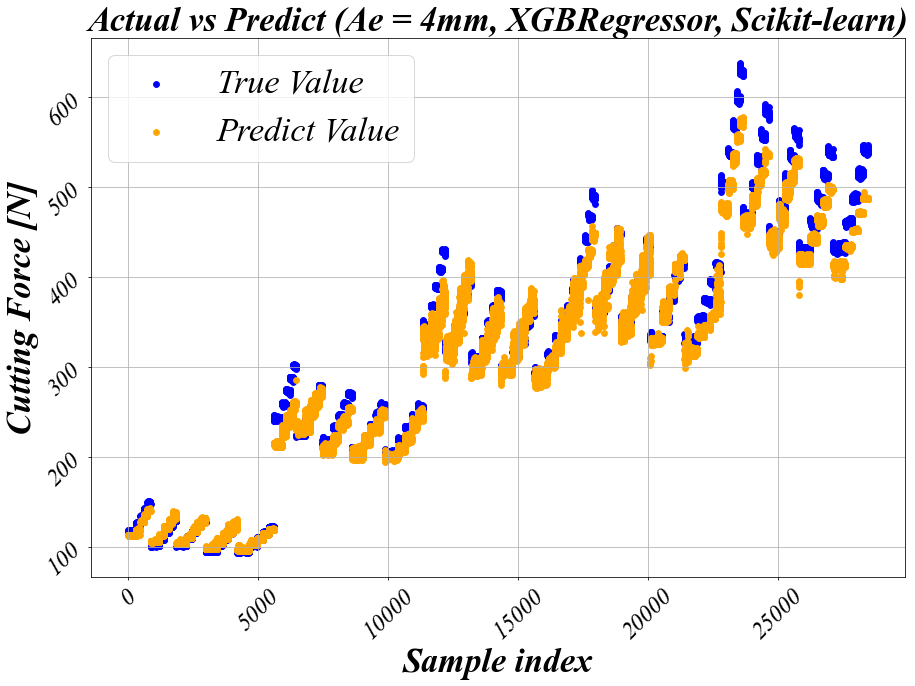

In [45]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 4mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

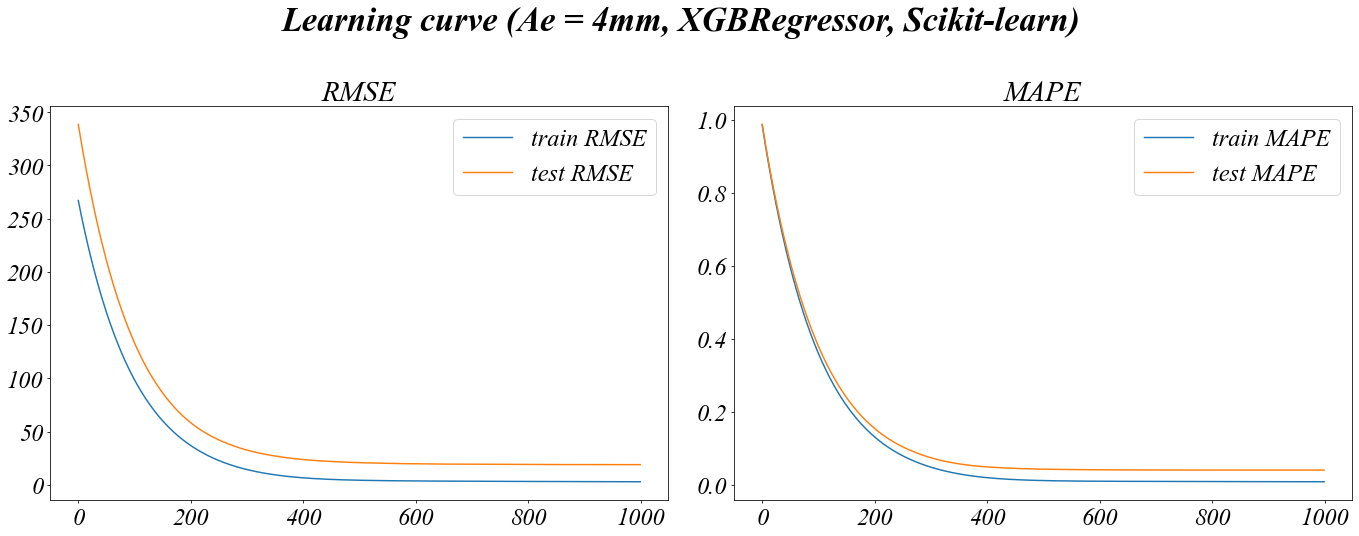

In [46]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ae = 4mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ae 4mm_cycle.png")